<a href="https://colab.research.google.com/github/iamzehan/algorithms-with-python/blob/main/dijkstra's_with_path.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

if you are unable to see the whole code, please visit this <a href="https://nbviewer.org/github/iamzehan/algorithms-with-python/blob/main/dijkstra%27s_with_path.ipynb" target="blank">link</a>

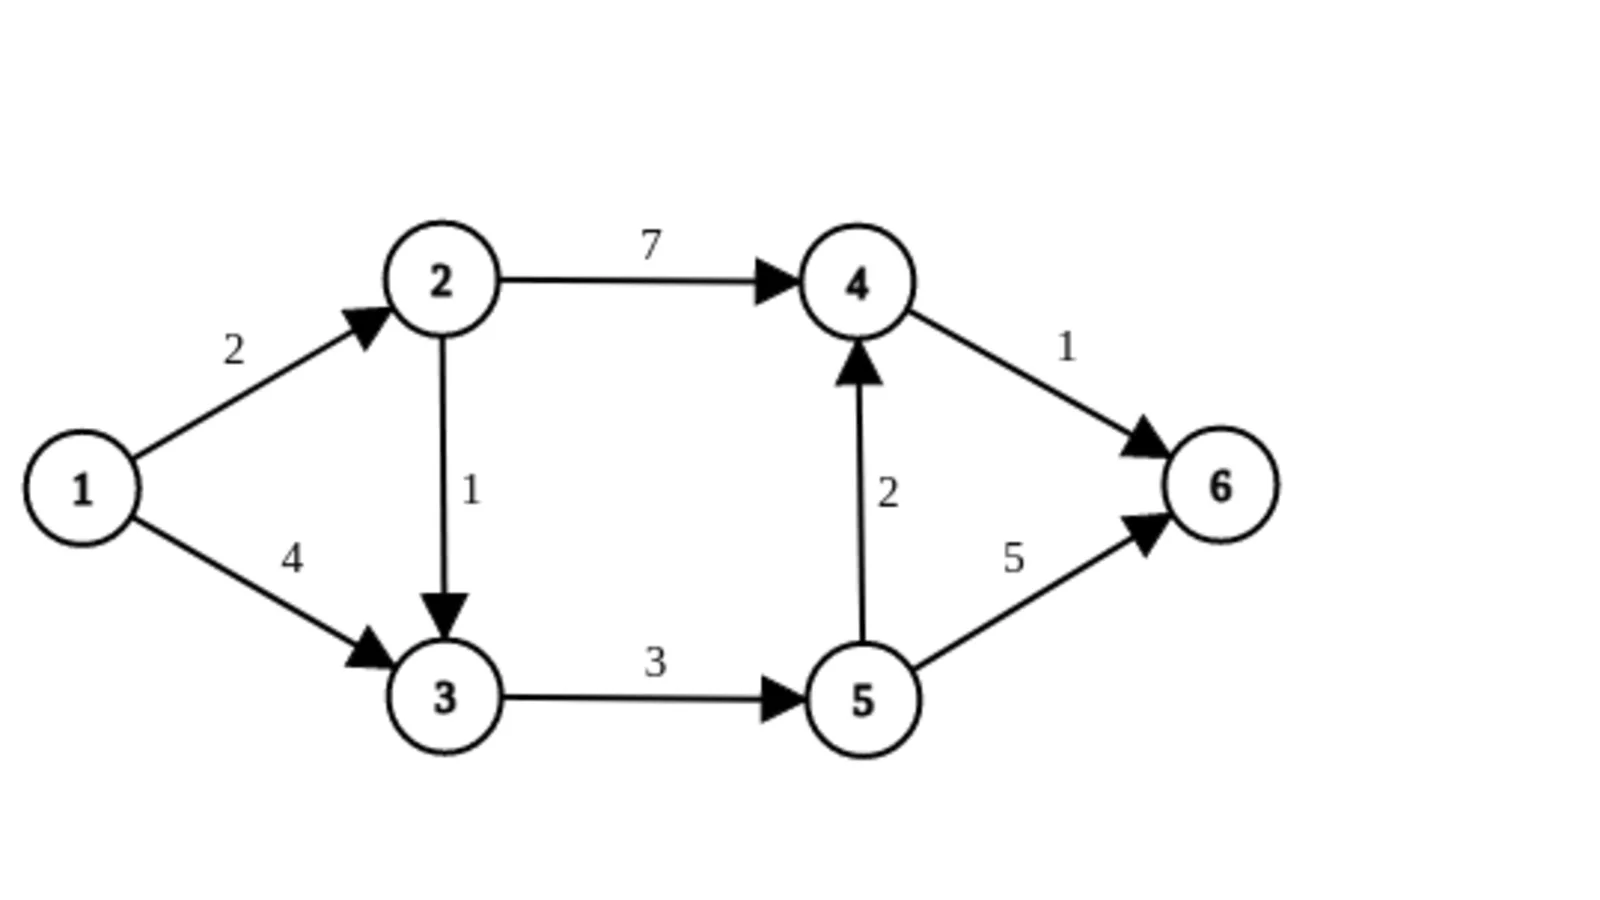

The presented graph is a directed graph, wherein the edges are annotated with costs, signifying the expenditure required to traverse from one node to another. It is incumbent upon you to embark on an exploration of this graph's nodes, with the objective of discerning the optimal path in terms of cost-efficiency. Your mission is to determine the most economical route for navigating from node "1" to node "6" while considering the associated costs along the chosen trajectory.

<center><h1> <b> Three things to consider while visiting the network graph </b></h1></center>

___

1. <b> The graph itself:</b> to keep tab on the nodes to visit.
2. <b> The cost factor:</b>  to keep track of costs along the way.
3. <b> The Origin/Parent:</b>  It's important to keep track of which node is to come from which, or it's difficult to trace them back to their origin.

# 1. The graph itself

In [ ]:
# Create an empty graph represented as a dictionary.
graph = {}

# Define node "1" and its connections.
graph["1"] = {}
graph["1"]["2"] = 2  # Cost to go from node "1" to "2" is 2.
graph["1"]["3"] = 4  # Cost to go from node "1" to "3" is 4.

# Define node "2" and its connections.
graph["2"] = {}
graph["2"]["3"] = 1  # Cost to go from node "2" to "3" is 1.
graph["2"]["4"] = 7  # Cost to go from node "2" to "4" is 7.

# Define node "3" and its connections.
graph["3"] = {}
graph["3"]["5"] = 3  # Cost to go from node "3" to "5" is 3.

# Define node "4" and its connections.
graph["4"] = {}
graph["4"]["6"] = 1  # Cost to go from node "4" to "6" is 1.

# Define node "5" and its connections.
graph["5"] = {}
graph["5"]["4"] = 2  # Cost to go from node "5" to "4" is 2.
graph["5"]["6"] = 5  # Cost to go from node "5" to "6" is 5.

# Define node "6" with no outgoing connections, represented as None.
graph["6"] = None
# The resulting graph represents a network with nodes connected by directed edges,
# where each edge has an associated cost (or weight) to travel from one node to another.


# 2. The cost factor

In [ ]:
# Create a dictionary to represent a graph with costs associated with each node.
costs = {}

# Define the cost to reach node "2" from a starting point.
costs["2"] = 2  # It costs 2 units to reach node "2" from the starting point.

# Define the cost to reach node "3" from a starting point.
costs["3"] = 4  # It costs 4 units to reach node "3" from the starting point.

# Define the cost to reach node "4" from a starting point.
costs["4"] = float("inf")  # The cost to reach node "4" is considered infinite or unreachable.

# Define the cost to reach node "5" from a starting point.
costs["5"] = float("inf")  # The cost to reach node "5" is considered infinite or unreachable.

# Define the cost to reach node "6" from a starting point.
costs["6"] = float("inf")  # The cost to reach node "6" is considered infinite or unreachable.

# In this representation, nodes "2" and "3" are reachable from a starting point with defined costs,
# while nodes "4," "5," and "6" are considered unreachable (costs are set to infinity) from the starting point.

# 3. The Origin/Parent

In [ ]:
# Create a dictionary to represent a graph that defines parent-child relationships between nodes.
parents = {}

# Define that node "2" is a child of node "1".
parents["2"] = "1"  # Node "1" is the parent of node "2".

# Define that node "3" is also a child of node "1".
parents["3"] = "1"  # Node "1" is the parent of node "3".

# In this representation, nodes "2" and "3" have a parent-child relationship with node "1".
# Node "1" is the parent node, and nodes "2" and "3" are the child nodes.

<h1><center><b>Implementation with Dijkstra's Algorithm </b></center></h1>

___

In [ ]:
def find_lowest_cost_node(costs,processed):
  lowest_cost = float("inf") # so this "inf" thing, it kinda tells you "I dunno" that's it.
  lowest_cost_node = None
  for node in costs.keys():
    if costs[node]<lowest_cost and node not in processed: # you see if you know the cost and it hasn't been in the processed nodes, you definitely have to check it out!
      lowest_cost = costs[node]
      lowest_cost_node = node
  return lowest_cost_node

In [ ]:
def find_path(tree_of_hierarchy, start, end):
  path=[]
  current_node = end # yup! back tracking is way better than starting from the top, iykyk
  while current_node !=start: # since start node doesn't have a parent, so we are going to add it manually later
    path.append(current_node)
    if current_node not in tree_of_hierarchy:
      return
    current_node = tree_of_hierarchy[current_node] # since the values of the keys refer to their parent node
  path.append(start) # here we are adding the start node manually.
  return " ➡ ".join(path[::-1]) # well, since we want to show off, why not add the paths and flip them over?

In [ ]:
def dijkstras_algorithm(graph,costs,parents,start,end):
  processed=[] # we keep this guy here to avoid checking the same node over and over, once you are in here, you are done!

  #hmm.. let's see, first of all we have to check the lowest path from the start node
  node = find_lowest_cost_node(costs,processed)
  while node is not None: # well, a node can't be None.. can it? Just some lame logic to iterate through it all, come now! bear with me...
    cost=costs[node] # find the cost to get to that node
    neighbors= graph[node] # find the neighbors of that node, ya know? spreading out thin
    # now let's visit our neighbors, shall we?
    if neighbors !=None:
      for n in neighbors.keys():
        new_cost = cost + neighbors[n] # the node's inherited cost added with the visiting cost with the neighbor
        # Ahh! now we have to look at our wallet, don't we?
        if new_cost<costs[n]: # if this costs less than the previous, it's obvious that we are going to take it.
          costs[n] = new_cost # then we keep tabs on the cost and update it when it's gotten cheaper. Neat eh?
          parents[n] = node  # well, if this current node has cost you less, then it's natural you make your way through this node right?

    # now that all that's out of the way, we consider node is processed after all it's neighbors got visited and the costs have been updated.
    processed.append(node)
    # now what do we do? Oh! yes.. we pick the next node that apparently hasn't been processed.
    node = find_lowest_cost_node(costs,processed)

  # When all that's out of the way, we finally get the lowest cost to get to the end node and the path to do it with
  return costs[end],find_path(parents,start, end)

In [ ]:
start = "1"
end = "6"
lowest_cost, path = dijkstras_algorithm(graph, costs, parents, start, end)

print(f"lowest cost to get from '{start}' to '{end}' is: \t {lowest_cost}")

print(f"The path that costs the minimum to get from '{start}' to '{end}' is: \t {path}")

lowest cost to get from '1' to '6' is: 	 9
The path that costs the minimum to get from '1' to '6' is: 	 1 ➡ 2 ➡ 3 ➡ 5 ➡ 4 ➡ 6
